In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
df = pd.read_csv("HousePriceDataset.csv")
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,LocationScore,Price
0,1660,1,2,2,2010,1,3,369758.2
1,4572,5,3,2,1951,1,7,1011357.8
2,3892,4,1,1,1982,0,4,842272.3
3,1266,1,2,2,2021,0,10,288673.3
4,4244,4,3,2,2011,0,7,852445.4


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           5000 non-null   int64  
 1   Bedrooms       5000 non-null   int64  
 2   Bathrooms      5000 non-null   int64  
 3   Floors         5000 non-null   int64  
 4   YearBuilt      5000 non-null   int64  
 5   Garage         5000 non-null   int64  
 6   LocationScore  5000 non-null   int64  
 7   Price          5000 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [13]:
df.shape

(5000, 8)

In [14]:
#check for missing values
df.isnull().sum()

Area             0
Bedrooms         0
Bathrooms        0
Floors           0
YearBuilt        0
Garage           0
LocationScore    0
Price            0
dtype: int64

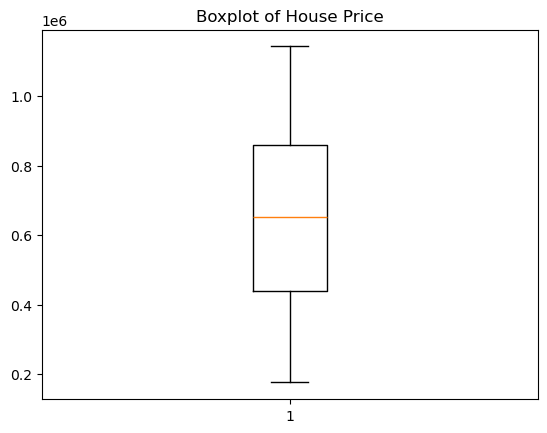

In [15]:
#outlier detection
plt.boxplot(df['Price'])
plt.title("Boxplot of House Price")
plt.show()

In [16]:
#Feature Target split
#X = df[['','','']]
x = df.drop('Price', axis = 1)
y = df['Price']

In [20]:
#Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [22]:
x_scaled

array([[-1.05599473e+00, -1.39443839e+00,  2.46594323e-04, ...,
         1.08799489e+00,  9.99200320e-01, -8.98845081e-01],
       [ 1.35797923e+00,  1.41721276e+00,  1.23321821e+00, ...,
        -1.65723448e+00,  9.99200320e-01,  4.94821220e-01],
       [ 7.94276516e-01,  7.14299976e-01, -1.23272502e+00, ...,
        -2.14825830e-01, -1.00080032e+00, -5.50428506e-01],
       ...,
       [-9.12582130e-01,  7.14299976e-01, -1.23272502e+00, ...,
        -2.87085851e-02, -1.00080032e+00, -8.98845081e-01],
       [ 2.87773052e-01, -1.39443839e+00,  1.23321821e+00, ...,
         8.55348331e-01,  9.99200320e-01, -1.24726166e+00],
       [-1.66612002e+00,  1.41721276e+00,  1.23321821e+00, ...,
        -1.00582412e+00,  9.99200320e-01, -5.50428506e-01]],
      shape=(5000, 7))

In [24]:
#Training & Testing
X_train, X_test, y_train, y_test, = train_test_split(
    x_scaled, y, test_size = 0.2, random_state = 42)


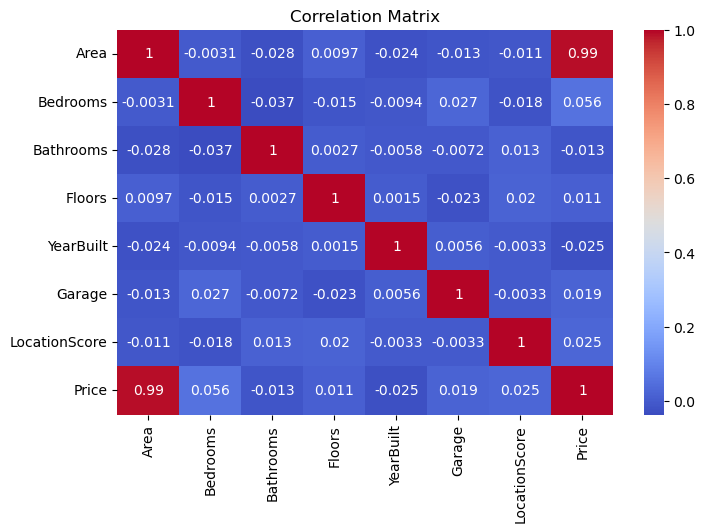

In [26]:
#Correlation Heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

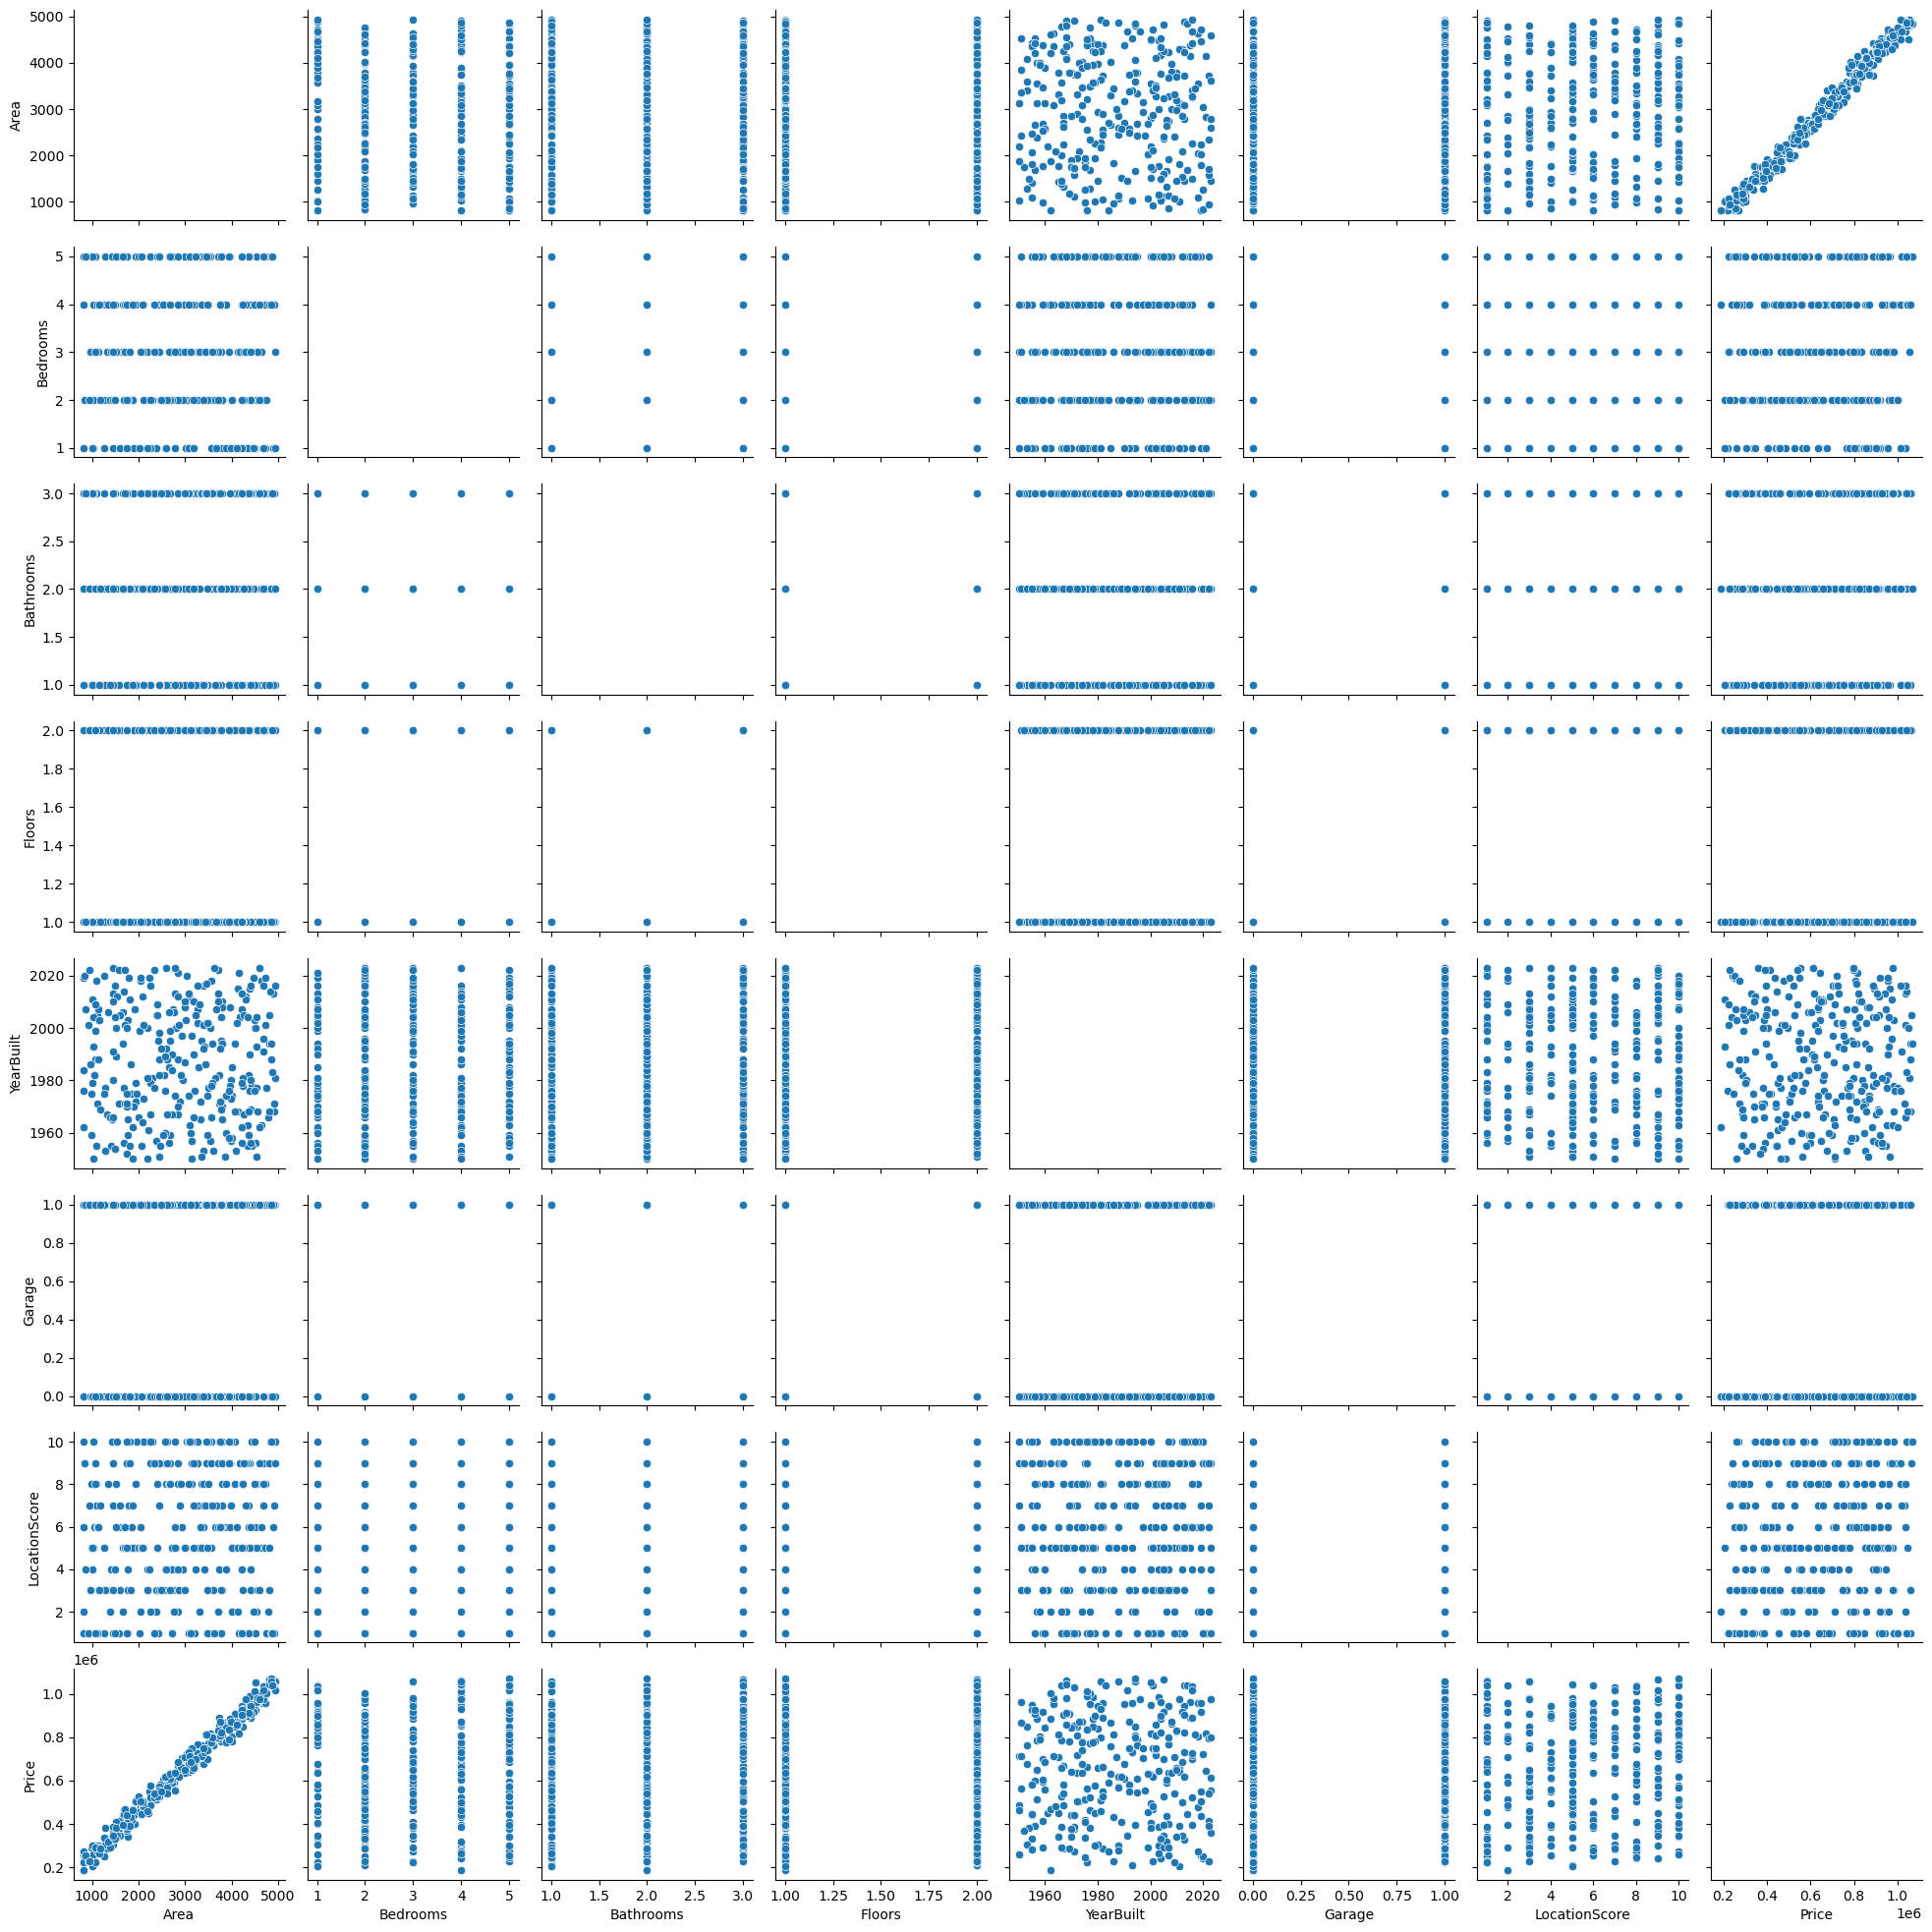

In [7]:
#pairplot
sns.pairplot(df.sample(300), diag_kind = 'kide')
plt.show()

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
#prediction
y_pred = model.predict(X_test)
#y_pred = model.predict([[1660,1,2,2,2010,1,3]])
y_pred

array([ 636294.41828347,  573944.6103285 ,  707844.02296641,
        359656.36527797,  256200.59944115,  894446.94727123,
       1043546.71292992,  756441.65706178,  737149.85181612,
        766959.07345186,  271909.38672931,  897314.44095897,
        404667.29199497,  374127.10760351,  896601.55020856,
        546073.17580911,  357216.96557332,  565203.08285918,
       1030166.34685919,  573317.06631815,  947642.64247972,
       1000295.51123341,  661488.7168238 ,  629528.44464502,
        577883.00813622,  506940.94663751,  758696.63343734,
        909000.1712229 ,  591178.64024027, 1039522.21537745,
        866206.88401431,  792649.33258108,  848996.52026972,
        878758.1499396 ,  819680.02358404,  590834.58240966,
        642586.77071339,  635866.10525743,  462352.83280385,
        987283.09743426,  730113.37398574,  538176.4295247 ,
        860554.22225199,  290598.51350174, 1043340.89358313,
        536045.11731154,  291424.10509754,  818247.09908874,
        641946.34769963,

In [31]:
#Evalution
print("MSE :",mean_squared_error(y_test,y_pred))
print("R^2 Score:",r2_score(y_test, y_pred))

MSE : 588697300.075079
R^2 Score: 0.9899136800135677


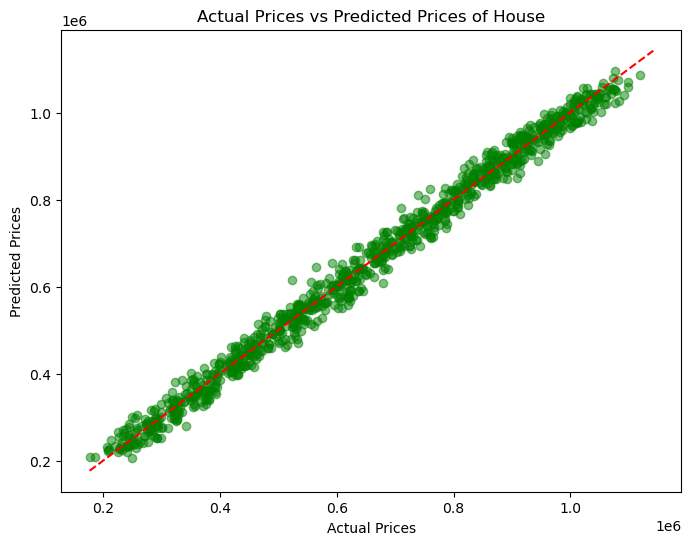

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha = 0.5, color = 'green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices of House')
plt.plot([y.min(), y.max()],[y.min(), y.max()],'--r')